* Importación de bibliotecas

In [ ]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

* Carga el conjunto de datos

In [ ]:
housing = fetch_california_housing()

* Crear conjuntos de datos de entrenamiento, validación y prueba

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_valid:', X_valid.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('y_valid:', y_valid.shape)



X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


* Escalamiento de los datos

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

* Crear el modelo de red neuronal

In [ ]:
model = keras.models.Sequential([keras.layers.Dense(30, activation = 'relu',
                                                   input_shape = X_train.shape[1:]),
                                keras.layers.Dense(1)])

* Compilar el modelo

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics = [keras.metrics.RootMeanSquaredError(),
                         'mean_absolute_percentage_error'])

* Entrenamiento del modelo

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 0.7655 - root_mean_squared_error: 0.8749 - mean_absolute_percentage_error: 34.0092 - val_loss: 0.4804 - val_root_mean_squared_error: 0.6931 - val_mean_absolute_percentage_error: 28.1151
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5327 - root_mean_squared_error: 0.7299 - mean_absolute_percentage_error: 29.2824 - val_loss: 0.4694 - val_root_mean_squared_error: 0.6851 - val_mean_absolute_percentage_error: 26.9854
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4987 - root_mean_squared_error: 0.7062 - mean_absolute_percentage_error: 27.1314 - val_loss: 0.4373 - val_root_mean_squared_error: 0.6613 - val_mean_absolute_percentage_error: 26.5329
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3949 - root_mean_squared_error: 0.6284 - mean_absolute_percentage_error: 25.2086 - val_loss: 0.4218 - val_root_mean_squared_error: 0.6494 - val_

* Graficar el historial de entrenamiento

<Axes: >

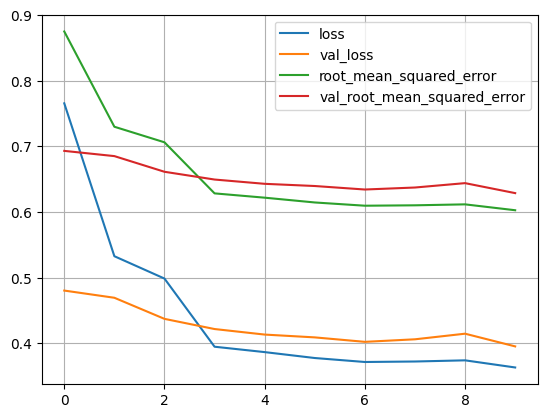

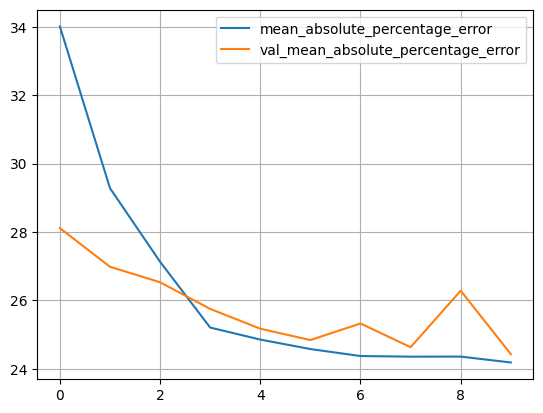

In [ ]:
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss','val_loss','root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)


* Evaluación del modelo

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train:", loss)
print("root_mean_squared_error train: ", RMSE)
print("mean_absolute_percentage_error train: ", MAPE)

# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid:", loss)
print("root_mean_squared_error valid: ", RMSE)
print("mean_absolute_percentage_error valid: ", MAPE)

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test:", loss)
print("root_mean_squared_error test: ", RMSE)
print("mean_absolute_percentage_error test: ", MAPE)

363/363 [==============================] - 1s 2ms/step - loss: 0.3593 - root_mean_squared_error: 0.5994 - mean_absolute_percentage_error: 23.5183
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.3592997193336487
root_mean_squared_error train:  0.5994161367416382
mean_absolute_percentage_error train:  23.518274307250977
121/121 [==============================] - 0s 2ms/step - loss: 0.3954 - root_mean_squared_error: 0.6288 - mean_absolute_percentage_error: 24.4337
Evaluar el modelo en el conjunto de validación
loss valid: 0.39535292983055115
root_mean_squared_error valid:  0.6287709474563599
mean_absolute_percentage_error valid:  24.433725357055664
162/162 [==============================] - 0s 2ms/step - loss: 0.4237 - root_mean_squared_error: 0.6509 - mean_absolute_percentage_error: 25.1748
Evaluar el modelo en el conjunto de prueba
loss test: 0.42372819781303406
root_mean_squared_error test:  0.6509440541267395
mean_absolute_percentage_error test:  25.174848556518555
